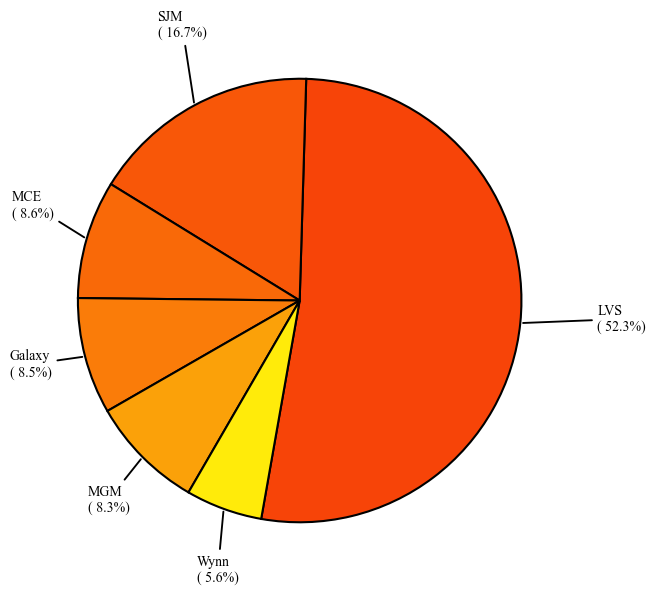

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 设置中文显示支持
plt.rcParams['font.family'] = ["Times New Roman", 'SimSun']

# 读取数据并排序
df = pd.read_csv('data1.csv')
sorted_data = df.sort_values(by='Price', ascending=False)
prices = sorted_data['Price']
#print(prices)
cuts = sorted_data['Cut']
total = sum(prices)

# 计算百分比及排序
percentages = [(price / total) * 100 for price in prices]  # 原顺序百分比
#print(percentages)
#percentage_sort = sorted(percentages, reverse=True)  # 百分比降序

# 配色方案
colors = ['#f74408', '#f85708', '#f96908', '#fa7c09', '#fba109', '#ffeb0a']

# 绘制饼图
plt.figure(figsize=(6, 6))
wedges, _ = plt.pie(
    x=prices,
    colors=colors,
    startangle=-100,
    radius=1.2,
    counterclock=True,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'},
)

# 添加引导线和注释
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2  # 计算区域中心角度
    x = wedge.r * np.cos(np.radians(angle))  # 引导线起点 x 坐标
    y = wedge.r * np.sin(np.radians(angle))  # 引导线起点 y 坐标

    # 定义注释文本（基于原始顺序的百分比）
    annotation_text = f'{cuts[i]}\n( {percentages[i]:.1f}%)'

    # 在图表外部添加注释
    plt.annotate(annotation_text, xy=(x, y), xytext=(x * 1.35, y * 1.35),
                 arrowprops=dict(arrowstyle="-", lw=1.35))

# 显示图表
plt.show()


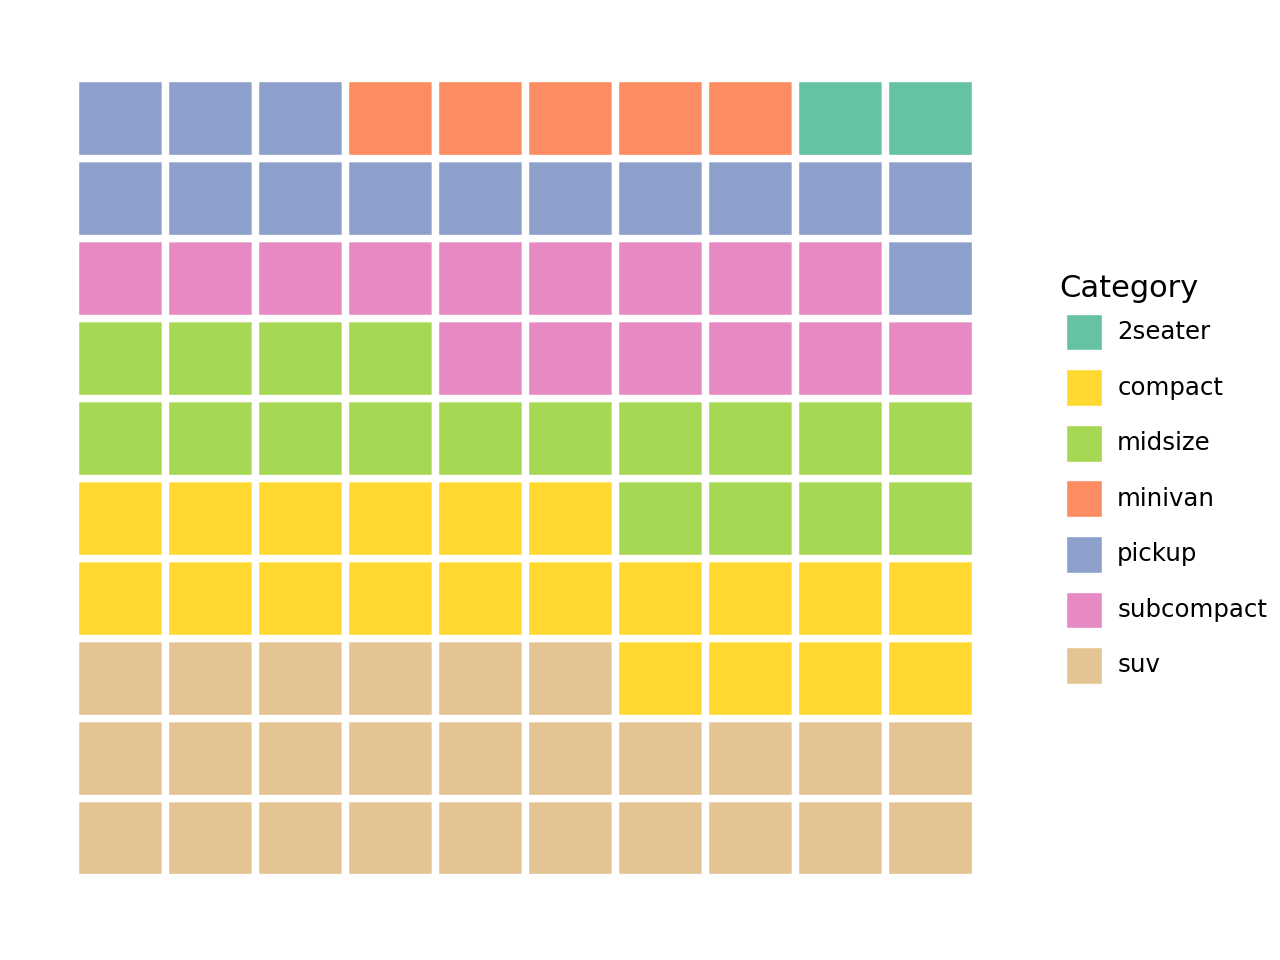

<Figure Size: (640 x 480)>

In [22]:
import pandas as pd
from plotnine import *
import numpy as np

# 加载plotnine自带的数据集mpg
from plotnine.data import mpg

# 计算每个类别的比例
category_counts = mpg['class'].value_counts(normalize=True).reset_index()
category_counts.columns = ['class', 'proportion']
category_counts['count'] = (category_counts['proportion'] * 100).round().astype(int)

# 定义颜色
category_colors = {
    '2seater': '#66c2a5',
    'minivan': '#fc8d62',
    'pickup': '#8da0cb',
    'subcompact': '#e78ac3',
    'midsize': '#a6d854',
    'compact': '#ffd92f',
    'suv': '#e5c494'
}

# 根据比例生成网格数据
waffle_data = []
for i, row in category_counts.iterrows():
    waffle_data.extend([row['class']] * row['count'])

# 创建数据框
waffle_df = pd.DataFrame({
    'class': waffle_data,
    'x': np.tile(range(10), 10),  # 10x10网格
    'y': np.repeat(range(10), 10)
})

# 绘制图形
(ggplot(waffle_df, aes(x='x', y='y', fill='class')) +
 geom_tile(color='white', size=1.5) +
 scale_fill_manual(values=category_colors) +
 theme_void() +
 theme(legend_title=element_text(text='Category'),
       legend_position='right',
       plot_background=element_rect(fill='white')))


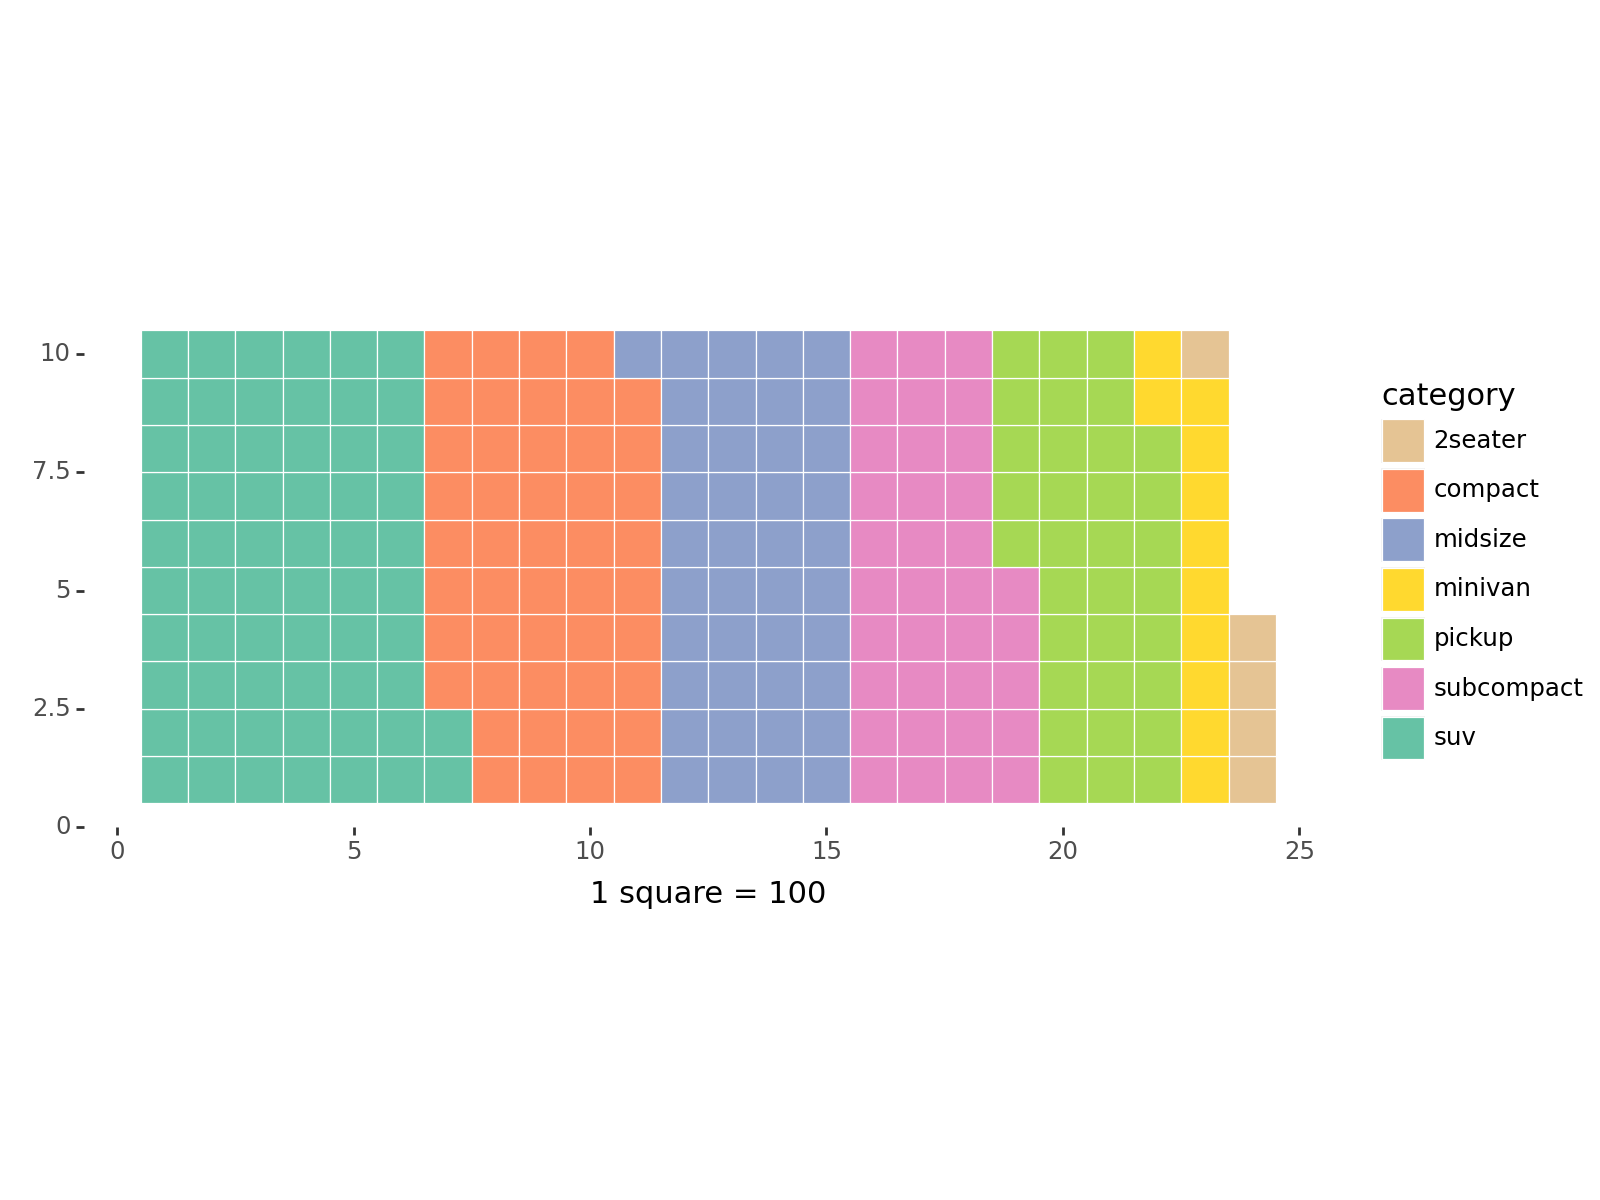

In [18]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mpg

#堆积型

data=(np.round(pd.value_counts(mpg['class'] ),0)).astype(int)
data1=data.sort_values(ascending=False)
ndeep= 10

a = np.arange(1,ndeep+1,1)
b = np.arange(1,np.ceil(data1.sum()/ndeep)+1,1)
X,Y=np.meshgrid(a,b)
colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494']
df_grid =pd.DataFrame({'x':X.flatten(),'y':Y.flatten()})
category=np.repeat(data1.index,data1[:])
df_grid=df_grid.loc[np.arange(0,len(category)),:]
df_grid['category']=pd.Categorical(category,categories=data1.index,ordered=False)

#块状

base_plot2=(ggplot(df_grid, aes(x = 'y', y = 'x', fill = 'category')) +
geom_tile(color = "white", size = 0.25) +
coord_fixed(ratio = 1)+
xlab("1 square = 100")+
ylab("")+
scale_fill_manual(values=colors, breaks=list(data.index)) +
theme(panel_background = element_blank(),
legend_position = "right",
figure_size = (8, 6),  #修改画布长宽比例
dpi = 100))  #修改画布大小


print(base_plot2)